In [1]:
import matplotlib.pyplot as plt
import cv2
import PIL
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, Dropout, Lambda, InputLayer
from keras.optimizers import Adam
from keras import metrics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
AllData=[]
with open('/content/drive/MyDrive/trainingdata/data.txt', encoding='utf-8', errors='ignore') as f:
  for line in f.readlines():
    AllData.append(line)

In [5]:
Images=[]
Steering=[]
# Throttle=[]
for i,data in enumerate(AllData):
    position=data.find('.png')
    if position >= 0:
        Images.append('/content/drive/MyDrive/trainingdata/'+data[:(position+4)])
        steering = AllData[i-1].find('Steer:')
        # throttle = AllData[i-1].find('Throttle:')
        firstComma=AllData[i-1].find(',', steering)
        secondComma=AllData[i-1].find(',', firstComma+1)
        Steering.append(float(AllData[i-1][firstComma+2:secondComma]))
        # firstComma=AllData[i-1].find(',', throttle)
        # secondComma=AllData[i-1].find(',', firstComma+1)
        # Throttle.append(float(AllData[i-1][firstComma+2:secondComma]))
print(len(Images))
print(Images[0])
print(Steering)

2825
/content/drive/MyDrive/trainingdata/00000194.png
[0.0, 5.633830255646899e-07, 6.176227884679975e-07, 6.763965529898996e-07, 7.154995955716004e-07, 7.744521894892387e-07, 8.088461527222535e-07, -7.396279784188664e-07, 8.32621083191043e-07, -7.582289072161075e-07, 2.775783514152863e-07, 3.16681393996987e-07, -7.955436558404472e-07, -8.493699397149612e-07, 1.5210297021894803e-07, 6.889024461997906e-07, 7.263960242198664e-07, 2.088500536956417e-07, 2.088500536956417e-07, -8.459722380393941e-07, 7.311050467251334e-07, 2.1034026076449663e-07, 2.1034026076449663e-07, 7.471992944374506e-07, 2.2869960503157927e-07, 2.2869960503157927e-07, 1.302298528571555e-06, 2.4735700776545855e-07, 2.4735700776545855e-07, 2.4735700776545855e-07, -2.894424540045293e-07, -3.23001927426958e-07, 1.977033008415674e-07, 1.977033008415674e-07, 2.3692554407261923e-07, 2.1999679233886127e-07, -3.1680264100941713e-07, -3.3486395523141255e-07, 1.660512936041414e-07, 1.2909416113870975e-07, -4.0770527220956865e-07,

In [6]:
roundedSteering=[]
for i in Steering:
  rounded=round(i,1)
  if rounded==-0.0:
    rounded=0.0
  roundedSteering.append(rounded)
print(roundedSteering)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

[-0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4] [   2   12   30  383 2267   90   22   11    8]


<BarContainer object of 9 artists>

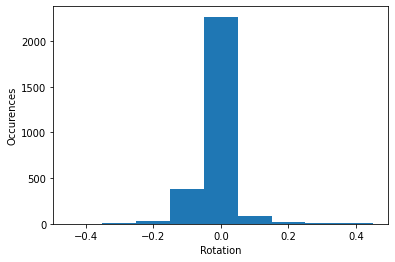

In [16]:
unique, count=np.unique(np.asarray(roundedSteering),return_counts=True)
print(unique, count)
plt.xlabel('Rotation')
plt.ylabel('Occurences')
plt.bar(unique, count, width=0.1)

(720, 1280, 3)
(120, 215, 3)


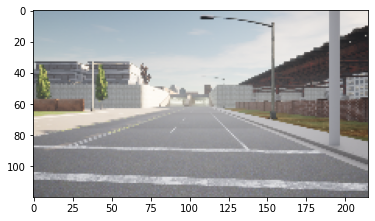

In [5]:
image=cv2.imread(Images[0])
#print(image/255)
print(image.shape)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=cv2.resize(image, (215, 120))
print(image.shape)
plt.imshow(image)

In [6]:
ImagesAsMatrix=[]
for image in Images:
   img=cv2.imread(image)
   img=cv2.resize(img, (215, 120))
   img=img/255
   ImagesAsMatrix.append(img)
ImagesAsMatrix=np.asarray(ImagesAsMatrix)

In [7]:
# X_train, X_valid, y_train, y_valid = train_test_split(ImagesAsMatrix, np.asarray(Steering), test_size = 0.1)

In [8]:
#fortest=np.where(np.asarray(Steering) < 0, -1, 1)#X_train, X_valid, y_train, y_valid = train_test_split(ImagesAsMatrix, fortest, test_size = 0.1)

In [9]:
# model = Sequential()
# model.add(InputLayer(input_shape=(120,215,3)))
# model.add(Conv2D(24, (5, 5), strides=(2,2), activation='relu'))
# model.add(Conv2D(36, (5, 5), strides=(2,2), activation='relu'))
# model.add(Conv2D(48, (5, 5), strides=(2,2), activation='relu'))
# model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1))
# model.summary()
# model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.00001), metrics=['mae'])

In [10]:
# history=model.fit(X_train, y_train, batch_size=200, epochs=25, validation_data=(X_valid, y_valid))

In [11]:
# ImagesAsMatrix2=[]
# for image in Images:
#    img=cv2.imread(image)
#    img=cv2.resize(img, (215, 120))
#    img=img/127.5-1
#    ImagesAsMatrix2.append(img)
# ImagesAsMatrix2=np.asarray(ImagesAsMatrix2)

In [12]:
#X_train, X_valid, y_train, y_valid = train_test_split(ImagesAsMatrix2, np.asarray(Steering), test_size = 0.1)

In [13]:
# model2 = Sequential()
# model2.add(InputLayer(input_shape=(120,215,3)))
# model2.add(Conv2D(24, (5, 5), strides=(2,2), activation='relu'))
# model2.add(Conv2D(36, (5, 5), strides=(2,2), activation='relu'))
# model2.add(Conv2D(48, (5, 5), strides=(2,2), activation='relu'))
# model2.add(Conv2D(64, (5, 5), activation='relu'))
# model2.add(Conv2D(64, (3, 3), activation='relu'))
# model2.add(Dropout(0.5))
# model2.add(Flatten())
# model2.add(Dense(100, activation='relu'))
# model2.add(Dense(50, activation='relu'))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(1))
# model2.summary()
# model2.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.00001), metrics=['mae'])

In [14]:
# history2=model2.fit(X_train, y_train, batch_size=200, epochs=25, validation_data=(X_valid, y_valid))

In [15]:
# model3 = Sequential()
# #model3.add(InputLayer(input_shape=(120,215,3)))
# model3.add(Lambda(lambda x: x/127.5-1, input_shape=(120,215,3)))
# model3.add(Conv2D(24, (5, 5), strides=(2,2), activation='relu'))
# model3.add(Conv2D(36, (5, 5), strides=(2,2), activation='relu'))
# model3.add(Conv2D(48, (5, 5), strides=(2,2), activation='relu'))
# model3.add(Conv2D(64, (5, 5), activation='relu'))
# model3.add(Conv2D(64, (3, 3), activation='relu'))
# model3.add(Dropout(0.5))
# model3.add(Flatten())
# model3.add(Dense(100, activation='relu'))
# model3.add(Dense(50, activation='relu'))
# model3.add(Dense(10, activation='relu'))
# model3.add(Dense(1))
# model3.summary()
# model3.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.00001), metrics=['mae'])

In [16]:
# ImagesAsMatrix3=[]
# for image in Images:
#    img=cv2.imread(image)
#    img=cv2.resize(img, (215, 120))
#    ImagesAsMatrix3.append(img)
# ImagesAsMatrix3=np.asarray(ImagesAsMatrix3)

In [17]:
#history3=model3.fit(X_train, y_train, batch_size=200, epochs=25, validation_data=(X_valid, y_valid))

In [18]:
# Xt_train, Xt_valid, yt_train, yt_valid = train_test_split(ImagesAsMatrix, np.asarray(Throttle), test_size = 0.1)

In [19]:
# tmodel = Sequential()
# tmodel.add(InputLayer(input_shape=(120,215,3)))
# tmodel.add(Conv2D(24, (5, 5), strides=(2,2), activation='relu'))
# tmodel.add(Conv2D(36, (5, 5), strides=(2,2), activation='relu'))
# tmodel.add(Conv2D(48, (5, 5), strides=(2,2), activation='relu'))
# tmodel.add(Conv2D(64, (5, 5), activation='relu'))
# tmodel.add(Conv2D(64, (3, 3), activation='relu'))
# tmodel.add(Dropout(0.5))
# tmodel.add(Flatten())
# tmodel.add(Dense(100, activation='relu'))
# tmodel.add(Dense(50, activation='relu'))
# tmodel.add(Dense(10, activation='relu'))
# tmodel.add(Dense(1))
# tmodel.summary()
# tmodel.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.00001), metrics=['mae'])

In [20]:
#historyt=tmodel.fit(Xt_train, yt_train, batch_size=200, epochs=25, validation_data=(Xt_valid, yt_valid))

In [21]:
# model.save('steering.h5')

In [22]:
# tmodel.save('throttle.h5')

In [23]:
roundedSteering=[]
for i in Steering:
  rounded=round(i,1)
  if rounded==-0.0:
    rounded=0.0
  roundedSteering.append(rounded)
print(roundedSteering)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [24]:
print(np.unique(np.asarray(roundedSteering),return_counts=True))
remap={-0.4: 0, -0.3: 1, -0.2: 2, -0.1: 3, 0.0: 4, 0.1:5, 0.2:6, 0.3:7, 0.4:8}
reverser={0:-0.4, 1:-0.3, 2:-0.2, 3:-0.1, 4:0.0, 5:0.1, 6:0.2, 7:0.3, 8:0.4}

(array([-0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4]), array([   2,   12,   30,  383, 2267,   90,   22,   11,    8]))


In [25]:
flattened=[]
for i in ImagesAsMatrix:
  flattened.append(i.flatten())

In [26]:
remapped=[]
for i in roundedSteering:
  remapped.append(remap[i])
print(remapped)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 5, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [27]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(sampling_strategy='majority')
ros=RandomOverSampler(sampling_strategy='not majority')


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [28]:
X_resampled, y_resampled=rus.fit_resample(np.array(flattened), np.array(remapped))
X_resampled, y_resampled=ros.fit_resample(X_resampled, y_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
print(np.unique(y_resampled,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([383, 383, 383, 383, 383, 383, 383, 383, 383]))


In [30]:
reshaped=[]
for i in X_resampled:
  reshaped.append(i.reshape(120,215,3))
reshaped=np.asarray(reshaped)

In [31]:
Steerings=[]
for i in y_resampled:
  Steerings.append(reverser[i])

In [32]:
model = Sequential()
model.add(InputLayer(input_shape=(120,215,3)))
model.add(Conv2D(24, (5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(36, (5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(48, (5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.00001), metrics=['mae'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 106, 24)       1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 51, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 24, 48)        43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 20, 64)         76864     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 18, 64)         36928     
_________________________________________________________________
dropout (Dropout)            (None, 6, 18, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6912)              0

In [33]:
history=model.fit(reshaped, np.array(Steerings), batch_size=200, epochs=50, validation_split=0.1)

Epoch 1/50
16/16 [==============================] - 63s 3s/step - loss: 0.0576 - mae: 0.2050 - val_loss: 0.1607 - val_mae: 0.4009
Epoch 2/50
16/16 [==============================] - 46s 3s/step - loss: 0.0556 - mae: 0.2017 - val_loss: 0.1618 - val_mae: 0.4023
Epoch 3/50
16/16 [==============================] - 46s 3s/step - loss: 0.0565 - mae: 0.2033 - val_loss: 0.1699 - val_mae: 0.4122
Epoch 4/50
16/16 [==============================] - 46s 3s/step - loss: 0.0538 - mae: 0.2006 - val_loss: 0.1958 - val_mae: 0.4425
Epoch 5/50
16/16 [==============================] - 46s 3s/step - loss: 0.0526 - mae: 0.2006 - val_loss: 0.1995 - val_mae: 0.4466
Epoch 6/50
16/16 [==============================] - 45s 3s/step - loss: 0.0492 - mae: 0.1941 - val_loss: 0.1864 - val_mae: 0.4317
Epoch 7/50
16/16 [==============================] - 46s 3s/step - loss: 0.0464 - mae: 0.1894 - val_loss: 0.1746 - val_mae: 0.4177
Epoch 8/50
16/16 [==============================] - 48s 3s/step - loss: 0.0414 - mae: 0.17

In [34]:
model.save('steering2.h5')